### Week 2: G2M Insight for Cab Investment Firm


**Project Description:** This task is to find out for a private firm in the US cab company to identify the right company to invest in. For this, market research will be made, and will be identified the right company among the two cab companies.

Steps for data analysis:

- Investigation of data sets and joined
- EDA and Visualisation
- Hypothesis tests

### Below are the list of datasets which are provided for the analysis:

- Cab_Data.csv – this file includes details of transaction for 2 cab companies

- Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

- Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

- City.csv – this file contains list of US cities, their population and number of cab users



## Import required Library

In [1]:
import datetime
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Read the given Datasets

In [2]:
Cab_Data = pd.read_csv("Cab_Data.csv")
Customer_ID =  pd.read_csv("Customer_ID.csv")
Transaction_ID = pd.read_csv("Transaction_ID.csv")
City = pd.read_csv("City.csv")

In [3]:
Cab_Data.shape

(359392, 7)

In [4]:
Customer_ID.shape

(49171, 4)

In [5]:
Transaction_ID.shape

(440098, 3)

In [6]:
City.shape

(20, 3)

In [7]:
Cab_Data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [8]:
Customer_ID.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [9]:
Transaction_ID.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [10]:
City.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [11]:
# Check the shape of whole dataset
print("shape of Cab_Data", Cab_Data.shape)
print("shape of Customer_ID", Customer_ID.shape)
print("shape of Transaction_ID", Transaction_ID.shape)
print("shape of City Data", City.shape)

shape of Cab_Data (359392, 7)
shape of Customer_ID (49171, 4)
shape of Transaction_ID (440098, 3)
shape of City Data (20, 3)


In [12]:
Cab_Data.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

### Converting Day of travel to data_time format, As day of travel is serial no format. 1900 is considered as leap year in excel.

In [13]:
from datetime import datetime, timedelta

# Serial date (from Excel)
serial_date = 42375

# Excel's base date is January 1, 1900
base_date = datetime(1900, 1, 1)

# Convert to datetime by adding the serial date as days to the base date
#date_of_travel = base_date + timedelta(days=serial_date - 2)  # Excel mistakenly considers 1900 a leap year, so subtract 2 days

#print(date_of_travel)

In [14]:
x=timedelta(days=serial_date - 2)
print (x)

42373 days, 0:00:00


In [15]:
base_date

datetime.datetime(1900, 1, 1, 0, 0)

In [16]:
date_of_travel = base_date + timedelta(days=serial_date - 2)
date_of_travel

datetime.datetime(2016, 1, 6, 0, 0)

In [17]:
# Function to convert a single serial date to datetime
def convert_serial_to_date(serial):
    base_date = datetime(1900, 1, 1)
    return base_date + timedelta(days=serial - 2)  # Subtract 2 for Excel's leap year bug

# Apply the function to the 'serial_date' column to convert all values
Cab_Data['converted_date'] = Cab_Data['Date of Travel'].apply(convert_serial_to_date)

# Show the converted dates
print(Cab_Data.head())

   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip converted_date  
0         370.95       313.635     2016-01-08  
1         358.52       334.854     2016-01-06  
2         125.20        97.632     2016-01-02  
3         377.40       351.602     2016-01-07  
4         114.62        97.776     2016-01-03  


In [18]:
#add 'Profit' column
Cab_Data['Profit'] = pd.DataFrame(Cab_Data["Price Charged"] - Cab_Data["Cost of Trip"])
Cab_Data.head()
     

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,converted_date,Profit
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016-01-08,57.315
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016-01-06,23.666
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016-01-02,27.568
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016-01-07,25.798
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016-01-03,16.844


In [19]:
Cab_Data['Company'].value_counts()

Company
Yellow Cab    274681
Pink Cab       84711
Name: count, dtype: int64

In [20]:
Cab_Data['City'].value_counts()

City
NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: count, dtype: int64

### Checking any missing data

In [21]:
Cab_Data.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
converted_date    0
Profit            0
dtype: int64

### Descriptive statistics

In [22]:
Cab_Data.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,converted_date,Profit
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113,2017-08-17 01:37:55.042293760,137.253198
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000,2016-01-02 00:00:00,-220.060000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000,2016-11-23 00:00:00,28.012000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000,2017-09-10 00:00:00,81.962000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200,2018-05-12 00:00:00,190.030000
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000,2018-12-31 00:00:00,1463.966000
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661,NaN,160.311840


Descrisptive statiscs summarize numerical features. For example, mean distance travelled is 22.57km,with maximum 48km and minimum 1.90km.Standard deviation of 12, it means that, on average, the data points in your dataset differ from the mean by about 12 units. same for profit, average profit is 137.25 unit. Min profit is in negative value that menas the company is in loss whereas maximum profit is 1463.97 unit.

In [23]:
#Data preparation for City

In [24]:
City.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [25]:
City.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 612.0+ bytes


In [26]:
City.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [27]:
City["City"].unique()

array(['NEW YORK NY', 'CHICAGO IL', 'LOS ANGELES CA', 'MIAMI FL',
       'SILICON VALLEY', 'ORANGE COUNTY', 'SAN DIEGO CA', 'PHOENIX AZ',
       'DALLAS TX', 'ATLANTA GA', 'DENVER CO', 'AUSTIN TX', 'SEATTLE WA',
       'TUCSON AZ', 'SAN FRANCISCO CA', 'SACRAMENTO CA', 'PITTSBURGH PA',
       'WASHINGTON DC', 'NASHVILLE TN', 'BOSTON MA'], dtype=object)

In [28]:
#Change Data type to int ( first change "," in between numbers)

In [29]:
#Changing the data type
City['Population'] = City['Population'].apply(lambda x:x.replace(",",""))
City['Users'] = City['Users'].apply(lambda x:x.replace(",",""))

In [30]:
City['Population']=City['Population'].astype("int64")
City['Users']=City['Users'].astype("int64")


In [31]:
City.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 612.0+ bytes


In [32]:
# checking Customer_ID

In [33]:
Customer_ID.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [34]:
Customer_ID.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [35]:
Transaction_ID.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [36]:
Transaction_ID.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [37]:
#Join by customer id and transaction id (merge cab data and transaction id then with customer id data with "customer id")

In [38]:
# Step 1: Merge cab data with transaction data on 'transaction_id'
cab_transaction_merged = pd.merge(Cab_Data, Transaction_ID, on='Transaction ID', how='inner')

# Step 2: Merge the result with customer data on 'customer_id'
final_merged_data = pd.merge(cab_transaction_merged, Customer_ID, on='Customer ID', how='inner')

# Show the final merged data
print(final_merged_data)

        Transaction ID  Date of Travel     Company            City  \
0             10000011           42377    Pink Cab      ATLANTA GA   
1             10351127           43302  Yellow Cab      ATLANTA GA   
2             10412921           43427  Yellow Cab      ATLANTA GA   
3             10000012           42375    Pink Cab      ATLANTA GA   
4             10320494           43211  Yellow Cab      ATLANTA GA   
...                ...             ...         ...             ...   
359387        10439790           43107  Yellow Cab      SEATTLE WA   
359388        10439799           43103  Yellow Cab  SILICON VALLEY   
359389        10439838           43104  Yellow Cab       TUCSON AZ   
359390        10439840           43106  Yellow Cab       TUCSON AZ   
359391        10439846           43104  Yellow Cab       TUCSON AZ   

        KM Travelled  Price Charged  Cost of Trip converted_date    Profit  \
0              30.45         370.95      313.6350     2016-01-08   57.3150   
1  

In [39]:
final_merged_data.shape

(359392, 14)

In [40]:
# Step 3: Merge the result with city Data with city
final_data = pd.merge(final_merged_data, City, on='City', how='inner')


In [41]:
final_data.shape


(359392, 16)

In [42]:
final_data.shape

(359392, 16)

In [43]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  int64         
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   converted_date      359392 non-null  datetime64[ns]
 8   Profit              359392 non-null  float64       
 9   Customer ID         359392 non-null  int64         
 10  Payment_Mode        359392 non-null  object        
 11  Gender              359392 non-null  object        
 12  Age                 359392 non-null  int64         
 13  Income (USD/Month)  359392 no

In [44]:
descriptive_stats = final_data.describe(include='all')

In [45]:
print(descriptive_stats)

        Transaction ID  Date of Travel     Company         City  \
count     3.593920e+05   359392.000000      359392       359392   
unique             NaN             NaN           2           19   
top                NaN             NaN  Yellow Cab  NEW YORK NY   
freq               NaN             NaN      274681        99885   
mean      1.022076e+07    42964.067998         NaN          NaN   
min       1.000001e+07    42371.000000         NaN          NaN   
25%       1.011081e+07    42697.000000         NaN          NaN   
50%       1.022104e+07    42988.000000         NaN          NaN   
75%       1.033094e+07    43232.000000         NaN          NaN   
max       1.044011e+07    43465.000000         NaN          NaN   
std       1.268058e+05      307.467197         NaN          NaN   

         KM Travelled  Price Charged   Cost of Trip  \
count   359392.000000  359392.000000  359392.000000   
unique            NaN            NaN            NaN   
top               NaN         

In [46]:
final_data.nunique()

Transaction ID        359392
Date of Travel          1095
Company                    2
City                      19
KM Travelled             874
Price Charged          99176
Cost of Trip           16291
converted_date          1095
Profit                301825
Customer ID            46148
Payment_Mode               2
Gender                     2
Age                       48
Income (USD/Month)     22725
Population                19
Users                     19
dtype: int64

There are 359392 rows,of which  19 records for cities,2 unique company,cities,payment mode, gender exist.

In [48]:
# Group by cab_type and sum the profit for each type
profit_by_cab = final_data.groupby('Company')['Profit'].sum().reset_index()
profit_by_cab


,Company,Profit
0,Pink Cab,5.307328e+06
1,Yellow Cab,4.402037e+07


In [49]:
#Yellow Cab Makes more profit than pink cab

In [50]:
### Visualisation (EDA)

In [51]:
#Total transaction

C:\Users\Dell\AppData\Local\Temp\ipykernel_25648\2406410065.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data =group, x= 'Company', y= 'Transaction ID',palette="Spectral")
C:\Users\Dell\AppData\Local\Temp\ipykernel_25648\2406410065.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data =group, x="Company", y='Profit',palette="Spectral")


[Text(0, 0, '5.30733e+06')]

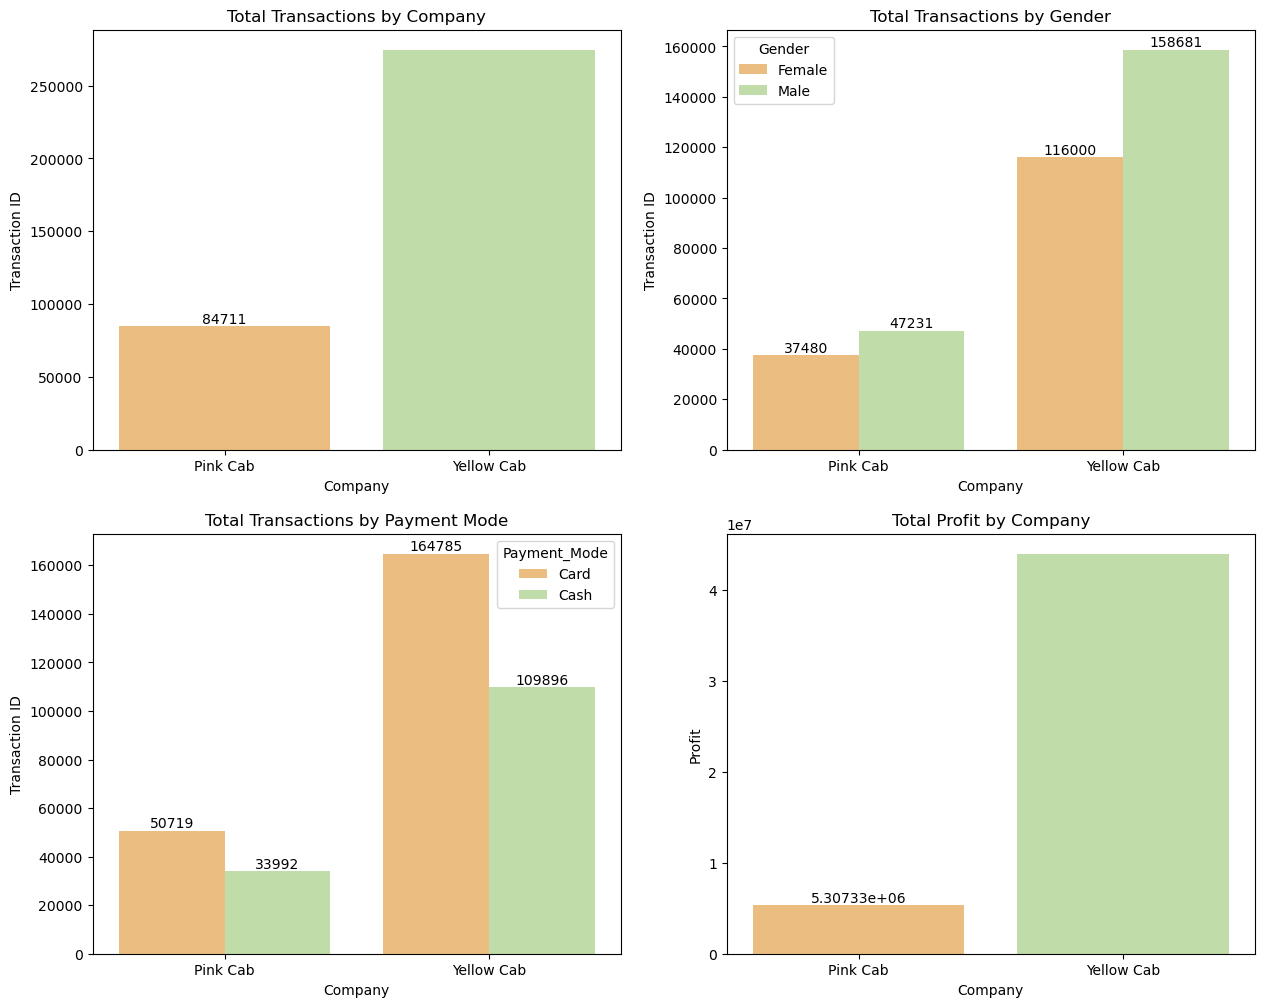

In [52]:
fig = plt.figure(figsize=(15,12))

fig.add_subplot(2,2,1)
group = final_data.groupby('Company')['Transaction ID'].count().reset_index()
ax = sns.barplot(data =group, x= 'Company', y= 'Transaction ID',palette="Spectral")
plt.title("Total Transactions by Company")
#sns.set_style("whitegrid")
ax.bar_label(ax.containers[0])

fig.add_subplot(2,2,2)
group = final_data.groupby(by=['Company','Gender'])['Transaction ID'].count().reset_index()
ax = sns.barplot(data =group, x="Company", hue="Gender", y='Transaction ID',palette="Spectral")
plt.title("Total Transactions by Gender")
#sns.set_style("whitegrid")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])


fig.add_subplot(2,2,3)
group = final_data.groupby(by=['Company','Payment_Mode'])['Transaction ID'].count().reset_index()
ax = sns.barplot(data =group, x="Company", hue="Payment_Mode", y='Transaction ID',palette="Spectral")
plt.title("Total Transactions by Payment Mode")
#sns.set_style("whitegrid")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

fig.add_subplot(2,2,4)
group = final_data.groupby(by=['Company'])['Profit'].sum().reset_index()
ax = sns.barplot(data =group, x="Company", y='Profit',palette="Spectral")
plt.title("Total Profit by Company")
#sns.set_style("whitegrid")
ax.bar_label(ax.containers[0])

In [53]:
#City wise income

C:\Users\Dell\AppData\Local\Temp\ipykernel_25648\2298328143.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data =group, x= 'City', y= 'Income (USD/Month)',palette="Spectral")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'NEW YORK NY'),
  Text(1, 0, 'CHICAGO IL'),
  Text(2, 0, 'LOS ANGELES CA'),
  Text(3, 0, 'WASHINGTON DC'),
  Text(4, 0, 'BOSTON MA'),
  Text(5, 0, 'SAN DIEGO CA'),
  Text(6, 0, 'SILICON VALLEY'),
  Text(7, 0, 'SEATTLE WA'),
  Text(8, 0, 'ATLANTA GA'),
  Text(9, 0, 'DALLAS TX'),
  Text(10, 0, 'MIAMI FL'),
  Text(11, 0, 'AUSTIN TX'),
  Text(12, 0, 'ORANGE COUNTY'),
  Text(13, 0, 'DENVER CO'),
  Text(14, 0, 'NASHVILLE TN'),
  Text(15, 0, 'SACRAMENTO CA'),
  Text(16, 0, 'PHOENIX AZ'),
  Text(17, 0, 'TUCSON AZ'),
  Text(18, 0, 'PITTSBURGH PA')])

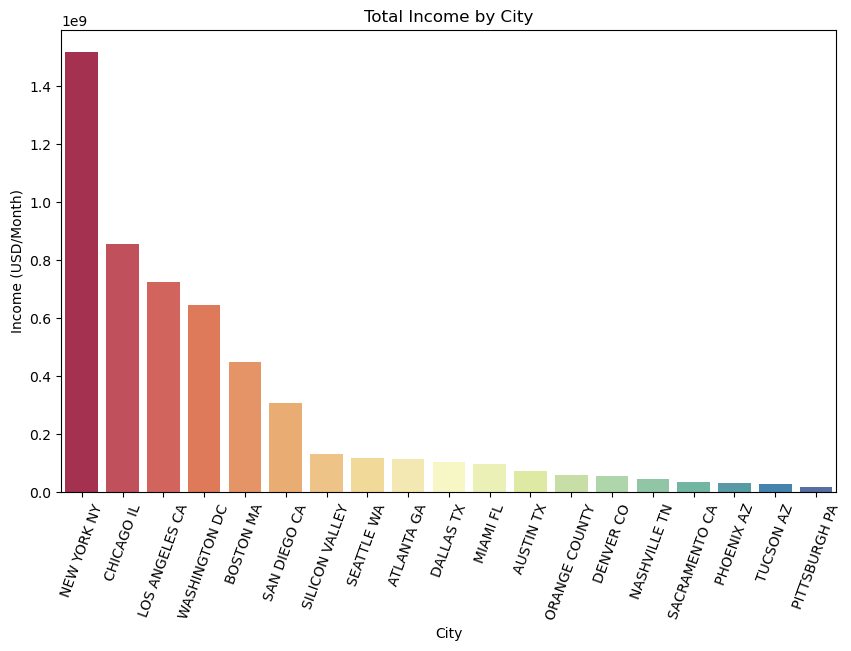

In [54]:
fig = plt.figure(figsize=(10,6))

group = final_data.groupby('City')['Income (USD/Month)'].sum().sort_values(ascending=False).reset_index()
ax = sns.barplot(data =group, x= 'City', y= 'Income (USD/Month)',palette="Spectral")
plt.title("Total Income by City")
plt.xticks(rotation=70)
     


In [55]:
### New york city has the highest income groups wheread  Ptttsburgh  has the lowest income group

In [56]:
City_Profit=final_data.groupby("City").agg({"Profit":"sum"}).sort_values('Profit').reset_index()
City_Profit.columns=['City','Profit']

In [57]:
City_Profit

,City,Profit
0,PITTSBURGH PA,8.516596e+04
1,SACRAMENTO CA,1.173262e+05
2,TUCSON AZ,1.402607e+05
3,NASHVILLE TN,1.495322e+05
4,PHOENIX AZ,1.929409e+05
5,DENVER CO,3.975850e+05
6,ORANGE COUNTY,4.570019e+05
7,AUSTIN TX,5.267010e+05
8,SEATTLE WA,6.046849e+05
9,MIAMI FL,7.583012e+05


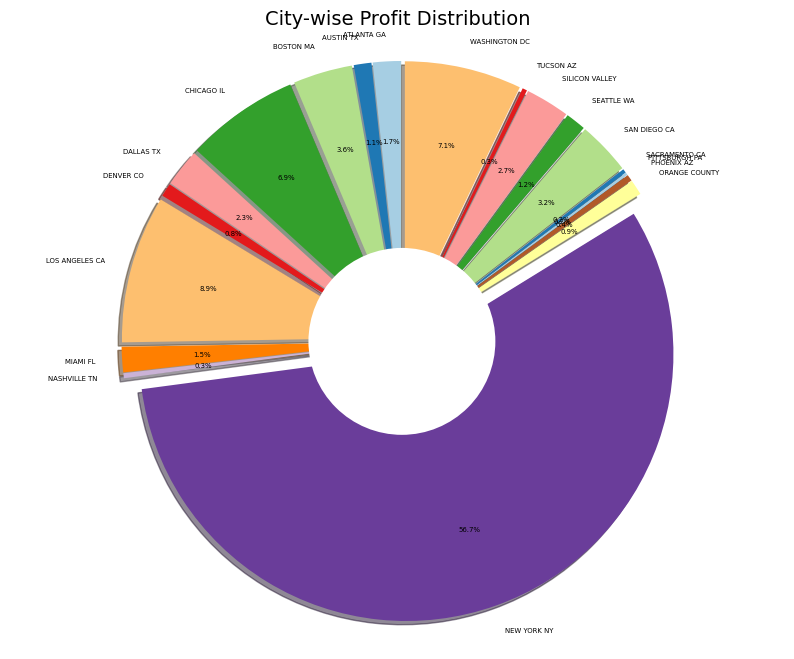

In [58]:
# Group by city and sum the profit for each city
city_profit = final_data.groupby('City')['Profit'].sum()

# Optional: explode for visual emphasis (customize as needed)
explodes = [0.1] * len(city_profit)  # Customize the explode values for each slice

# Prepare text properties
textprops = {'fontsize': 5}  # Set smaller font size for labels

# Plotting the pie chart
fig, ax = plt.subplots(figsize=(10, 8))
pie_properties = ax.pie(
    x=city_profit,
    labels=city_profit.index,  # Correct reference to city names
    autopct='%1.1f%%',
    pctdistance=0.7,
    colors=plt.cm.Paired.colors,
    radius=2,
    explode=explodes,
    shadow=True,
    startangle=90,
    textprops=textprops
)

# Draw a white circle at the center for a donut chart effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Display the pie chart
plt.title('City-wise Profit Distribution', fontsize=14)  # Add a title
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

Same as the income Profit for newyork city is highest , Los Angels comes after.

C:\Users\Dell\AppData\Local\Temp\ipykernel_25648\1806400478.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=population, x='Population',y='City', palette="Spectral")


Text(0.5, 1.0, 'Total Population by City')

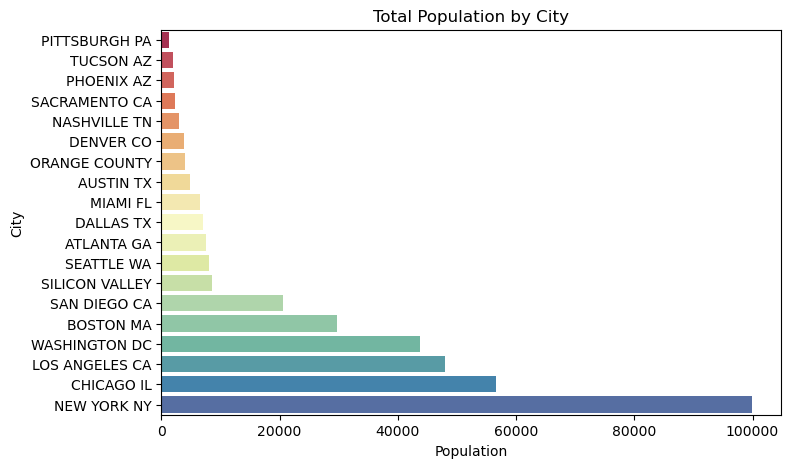

In [60]:
plt.figure(figsize=(8,5))
population=final_data.groupby("City").agg({"Population":"count"}).sort_values('Population').reset_index()
ax=sns.barplot(data=population, x='Population',y='City', palette="Spectral")
plt.title('Total Population by City')



In [61]:
#New york has the highest population where as Pittsburgh has the lowest. Profit or income proportinaly change with population.

In [62]:
final_data.columns


Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'converted_date', 'Profit',
       'Customer ID', 'Payment_Mode', 'Gender', 'Age', 'Income (USD/Month)',
       'Population', 'Users'],
      dtype='object')

Text(0.5, 1.0, 'Number of Customers in Cities by Company')

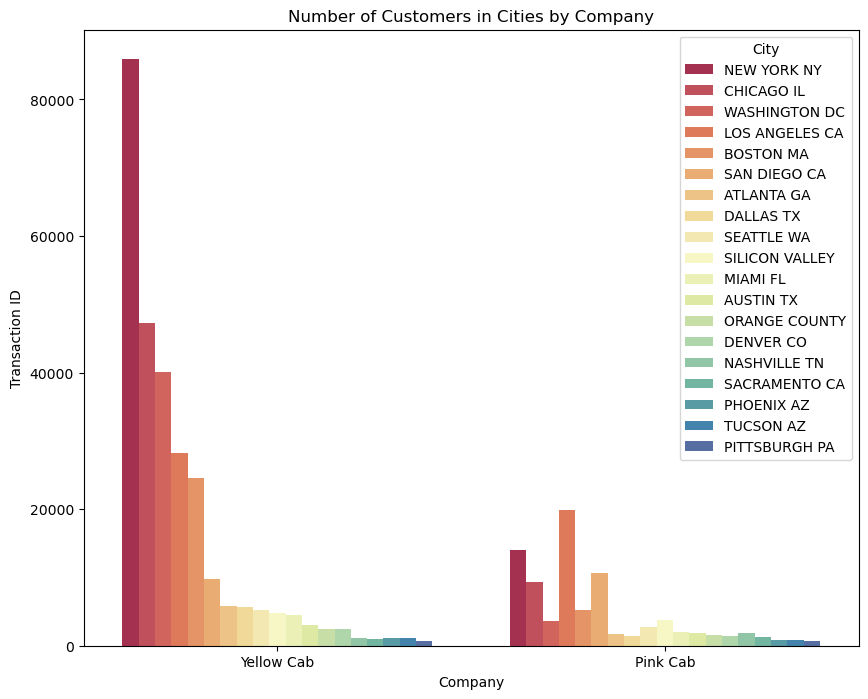

In [63]:
plt.figure(figsize=(10,8))
group = final_data.groupby(['Company','City'])['Transaction ID'].count().sort_values(ascending=False).reset_index()
ax = sns.barplot(data =group, x="Company", hue="City", y='Transaction ID',palette="Spectral")
plt.title("Number of Customers in Cities by Company")

In last 8 cities customers like both yellow and green cab, where as in first 10 cities significantly like yellow cab.

C:\Users\Dell\AppData\Local\Temp\ipykernel_25648\248912860.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = final_data.groupby(['Age_Group', 'Company'])['Profit'].sum().unstack().fillna(0)


<Figure size 1000x600 with 0 Axes>

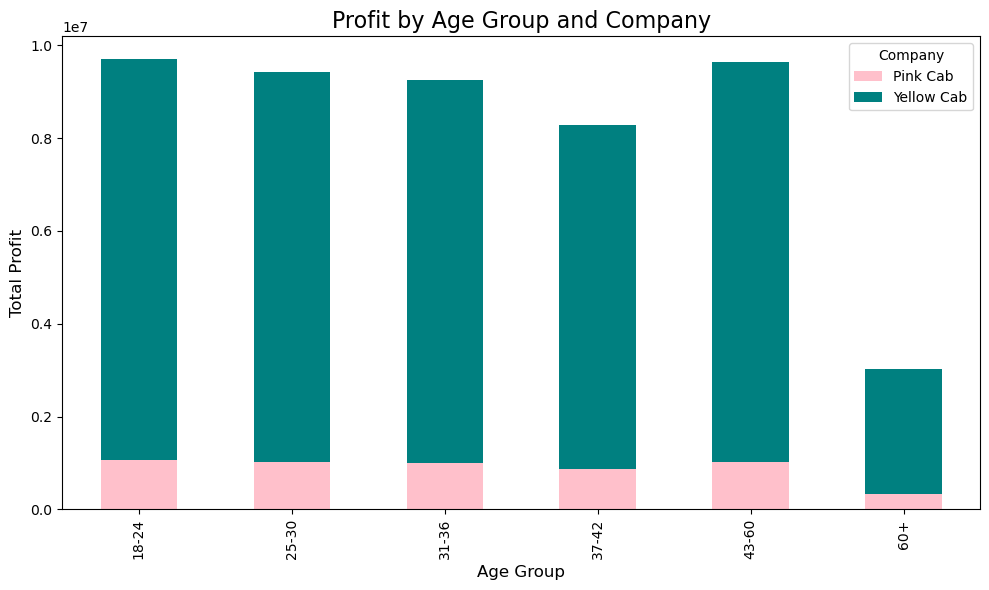

In [65]:
# Step 1: Divide ages into 6 groups (bins), adding 60+
bins = [18, 24, 30, 36, 42, 60, float('inf')]  # Use float('inf') for ages 60 and above
labels = ['18-24', '25-30', '31-36', '37-42', '43-60', '60+']  # Added label for 60+

# Create the Age_Group column
final_data['Age_Group'] = pd.cut(final_data['Age'], bins=bins, labels=labels, right=False)

# Step 2: Group by Age Group and Company, then sum profits
grouped_data = final_data.groupby(['Age_Group', 'Company'])['Profit'].sum().unstack().fillna(0)

# Step 3: Plot the data
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True, color=['pink', 'teal'], figsize=(10, 6))

# Add titles and labels
plt.title("Profit by Age Group and Company", fontsize=16)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Total Profit", fontsize=12)

plt.tight_layout()
plt.show()

Till 60,profit is almost same, for 60+ , the profit is significantly less.Preferably, the companies had to invest more for older people.

Text(0.5, 1.0, 'Profit in Cities by Company')

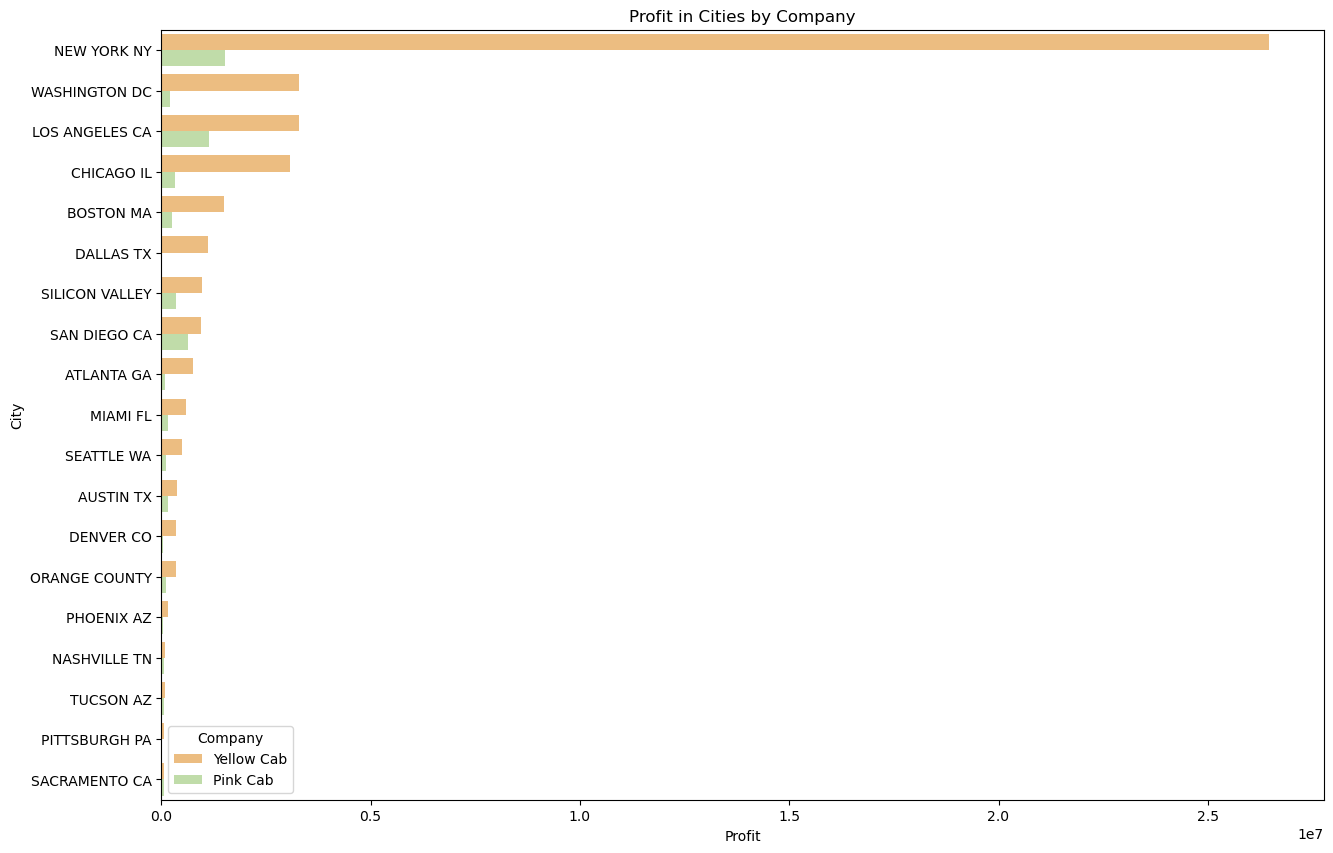

In [67]:
plt.figure(figsize=(15,10))
group = final_data.groupby(['Company','City'])['Profit'].sum().sort_values(ascending=False).reset_index()
ax = sns.barplot(data =group, x='Profit', y="City", hue="Company",palette="Spectral")
plt.title("Profit in Cities by Company")

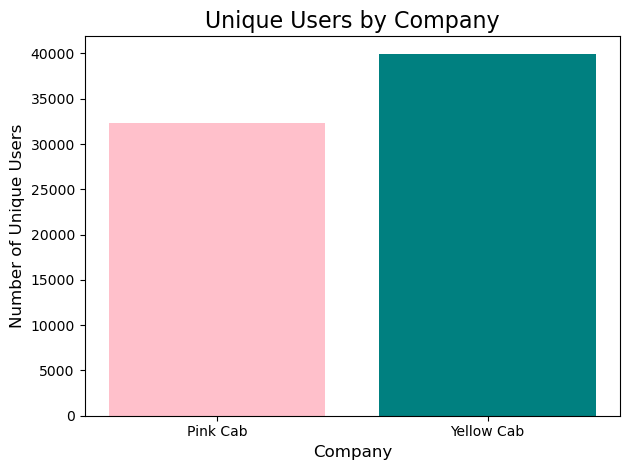

In [68]:
# Bar plot with color customization for the two companies

# Step 1: Count unique users by company
company_user_count = final_data.groupby('Company')['Customer ID'].nunique().reset_index()

# Rename the columns for better understanding
company_user_count.columns = ['Company', 'Unique Users']

plt.bar(company_user_count['Company'], company_user_count['Unique Users'], color=['pink', 'teal'])

# Adding title and labels
plt.title('Unique Users by Company', fontsize=16)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Number of Unique Users', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

In [69]:
# Step 1: Convert 'Date' column to datetime
final_data['Date'] = pd.to_datetime(final_data['converted_date'])

# Step 2: Extract year from 'Date' column
final_data['Year'] = final_data['Date'].dt.year

In [70]:
# Step 2: Group by Year and Company, and count unique users (Customer ID)
year_company_user_count = final_data.groupby(['Year', 'Company'])['Customer ID'].nunique().reset_index()

# Rename the columns for better understanding
year_company_user_count.columns = ['Year', 'Company', 'Unique Users']

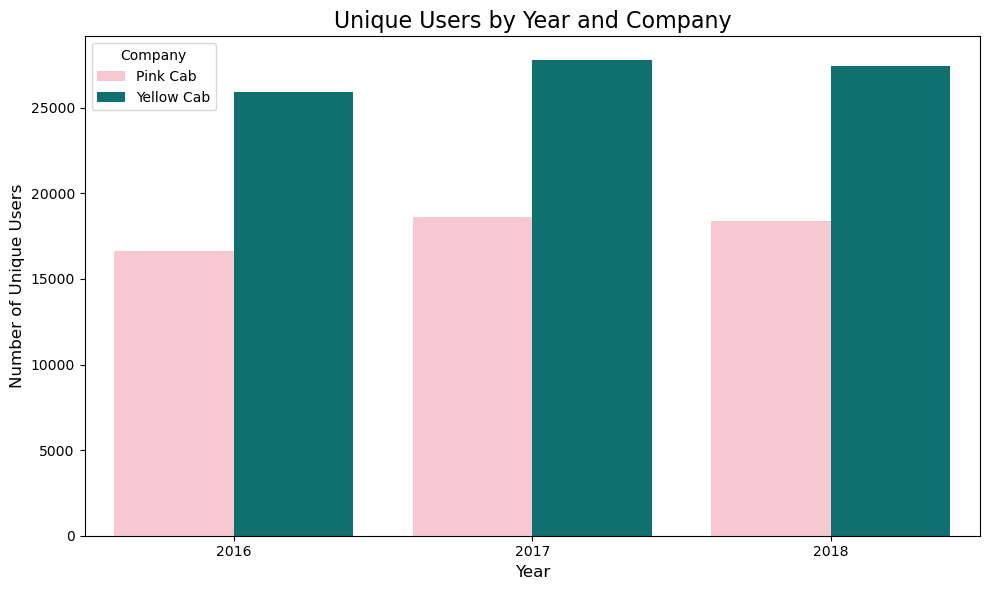

In [71]:
# Step 4: Bar plot for unique users by year and company
plt.figure(figsize=(10, 6))

# Using seaborn for a bar plot
sns.barplot(x='Year', y='Unique Users', hue='Company', data=year_company_user_count, palette=['pink', 'teal'])

# Adding title and labels
plt.title('Unique Users by Year and Company', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Unique Users', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

In [72]:
# Convert 'Date' column to datetime
final_data['Date'] = pd.to_datetime(final_data['converted_date'])

# Extract month as a number
final_data['Month_Number'] = final_data['Date'].dt.month

print(final_data)


        Transaction ID  Date of Travel     Company           City  \
0             10000011           42377    Pink Cab     ATLANTA GA   
1             10351127           43302  Yellow Cab     ATLANTA GA   
2             10412921           43427  Yellow Cab     ATLANTA GA   
3             10000012           42375    Pink Cab     ATLANTA GA   
4             10320494           43211  Yellow Cab     ATLANTA GA   
...                ...             ...         ...            ...   
359387        10307228           43162  Yellow Cab  WASHINGTON DC   
359388        10319775           43203  Yellow Cab  WASHINGTON DC   
359389        10347676           43287  Yellow Cab  WASHINGTON DC   
359390        10358624           43314  Yellow Cab  WASHINGTON DC   
359391        10370709           43342  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip converted_date    Profit  \
0              30.45         370.95      313.6350     2016-01-08   57.3150   
1              

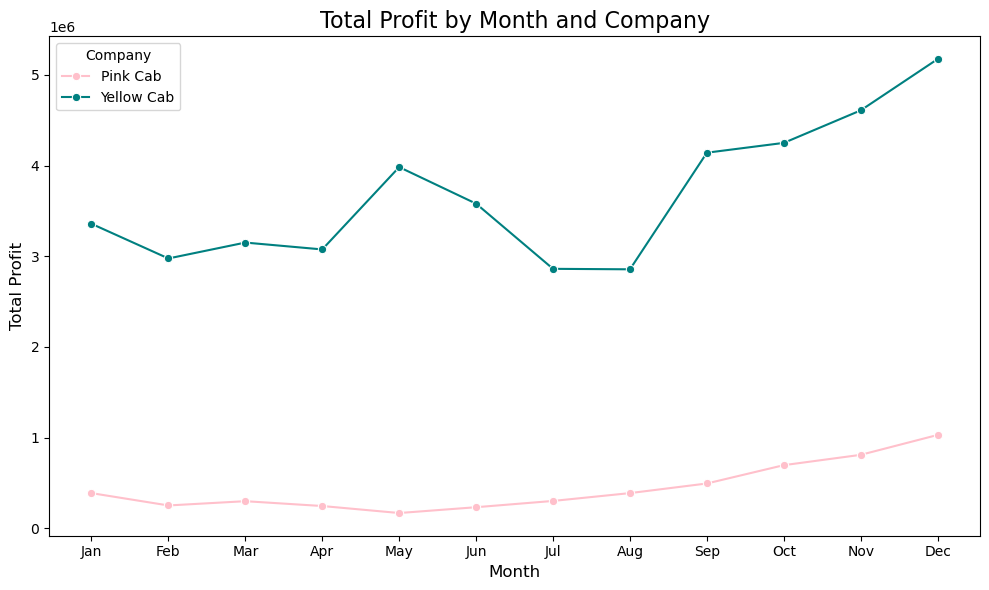

In [73]:
# Step 1: Group by 'Month_Number' and 'Company', and sum the profits for each company per month
monthly_profit_company = final_data.groupby(['Month_Number', 'Company'])['Profit'].sum().reset_index()

# Step 2: Plot the data with company-wise filter
plt.figure(figsize=(10, 6))

# Define the custom color palette with teal and pink
custom_palette = ["pink", "teal"]

# Use seaborn's lineplot with 'hue' to differentiate between companies and custom colors
sns.lineplot(x='Month_Number', y='Profit', hue='Company', data=monthly_profit_company, palette=custom_palette, marker="o")

# Add titles and labels
plt.title("Total Profit by Month and Company", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Profit", fontsize=12)

# Set x-axis to show months in order, starting from 1 (Jan) to 12 (Dec)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.tight_layout()
plt.show()

In [74]:
#Profit is higher in Nov/Dec, Mostly beacuse of festive season people like to take cab for their Christmas vacation.

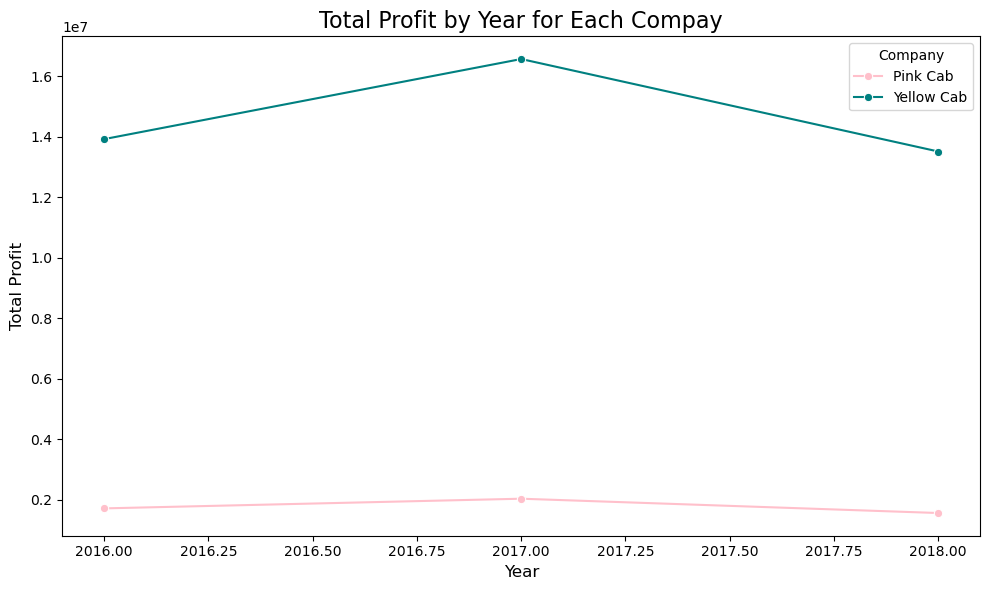

In [75]:
# Step 1: Convert 'Date' column to datetime
#final_data['Date'] = pd.to_datetime(final_data['converted_date'])

# Step 2: Extract year from 'Date' column
#final_data['Year'] = final_data['Date'].dt.year

# Step 3: Group by 'Year' and sum the profits
yearly_profit = final_data.groupby(['Year', 'Company'])['Profit'].sum().reset_index()
# Step 4: Plot the data
plt.figure(figsize=(10, 6))
custom_palette = ["pink", "teal"]
sns.lineplot(x='Year', y='Profit', data=yearly_profit,hue='Company',palette=custom_palette, marker="o")

# Add titles and labels
plt.title("Total Profit by Year for Each Compay", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Profit", fontsize=12)

plt.tight_layout()

# Show the plot
plt.show()

In 2017 profit was highest, 2018 profit decresed. Higher fuel price might be a reason for this decline.

In [ ]:
final_data.columns

In [ ]:
# Step 1: Filter data for Pink Cab and Yellow Cab based on the 'Company' column
PinkCab = final_data[final_data['Company'] == 'Pink Cab']
YellowCab = final_data[final_data['Company'] == 'Yellow Cab']

# Step 2: Calculate correlation for both cabs
corr_pink = PinkCab['KM Travelled'].corr(PinkCab['Price Charged'])
corr_yellow = YellowCab['KM Travelled'].corr(YellowCab['Price Charged'])

# Step 3: Create a figure with two subplots (one for Pink Cab, one for Yellow Cab)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 7))

# Scatter plot for Pink Cab with correlation in title
sns.scatterplot(x=PinkCab['KM Travelled'], y=PinkCab['Price Charged'], ax=ax1, color='pink')
ax1.set_title(f'Price vs Distance in Pink Cab\nCorrelation: {corr_pink:.2f}', fontsize=20)
ax1.set_xlabel('KM Travelled', fontsize=15)
ax1.set_ylabel('Price Charged', fontsize=15)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, fontsize=12)
# Scatter plot for Yellow Cab with correlation in title
sns.scatterplot(x=YellowCab['KM Travelled'], y=YellowCab['Price Charged'], ax=ax2, color='teal')
ax2.set_title(f'Price vs Distance in Yellow Cab\nCorrelation: {corr_yellow:.2f}', fontsize=20)
ax2.set_xlabel('KM Travelled', fontsize=15)
ax2.set_ylabel('Price Charged', fontsize=15)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, fontsize=12)

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


In [ ]:
Strong positive relation.

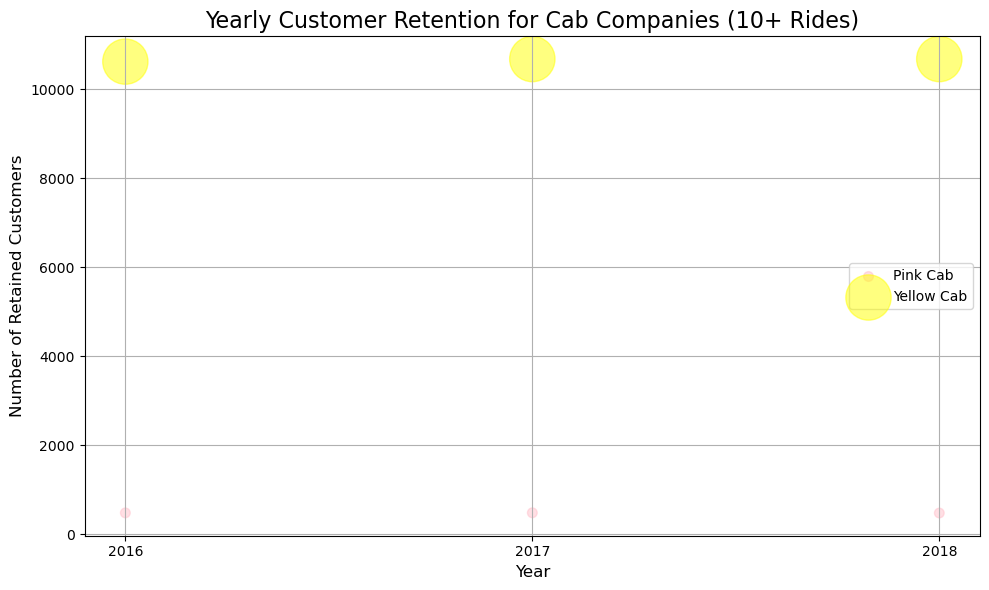

In [77]:
# Step 1: Define a function to calculate yearly retention for a given company
def calculate_yearly_retention(company_name):
    # Step 1: Count the number of rides per customer
    ride_counts = final_data[final_data['Company'] == company_name].groupby('Customer ID')['Transaction ID'].count().reset_index()
    ride_counts.columns = ['Customer ID', 'Number of Rides']
    
    # Step 2: Filter customers who took at least 10 rides
    frequent_customers = ride_counts[ride_counts['Number of Rides'] >= 10]
    
    # Step 3: Calculate retention over years
    # Extracting the year from 'converted_date' for retention analysis
    final_data['Year'] = final_data['converted_date'].dt.year
    
    # Determine the number of retained customers in subsequent years
    retention_data = final_data[(final_data['Customer ID'].isin(frequent_customers['Customer ID'])) & 
                                 (final_data['Company'] == company_name)]

    # Calculate yearly retention
    yearly_retention = retention_data.groupby(['Year', 'Customer ID']).size().reset_index(name='Rides')
    
    # Count distinct retained customers for each year
    yearly_retention_summary = yearly_retention.groupby('Year')['Customer ID'].nunique().reset_index(name='Retained Customers')
    
    return yearly_retention_summary

# Calculate yearly retention for both companies
pink_cab_retention = calculate_yearly_retention('Pink Cab')
yellow_cab_retention = calculate_yearly_retention('Yellow Cab')

# Step 4: Prepare data for bubble chart
# Combine the data for both companies into a single DataFrame
bubble_data = pd.DataFrame({
    'Year': pink_cab_retention['Year'],
    'Pink Cab Retained': pink_cab_retention['Retained Customers'],
    'Yellow Cab Retained': yellow_cab_retention['Retained Customers']
})

# Fill missing values with 0
bubble_data = bubble_data.fillna(0)

# Step 5: Create the bubble chart
plt.figure(figsize=(10,6))

# Pink Cab Bubbles
plt.scatter(bubble_data['Year'], bubble_data['Pink Cab Retained'],
            s=bubble_data['Pink Cab Retained'] * 0.1,  # Bubble size
            alpha=0.5, c='pink', label='Pink Cab')

# Yellow Cab Bubbles
plt.scatter(bubble_data['Year'], bubble_data['Yellow Cab Retained'],
            s=bubble_data['Yellow Cab Retained'] * 0.10,  # Bubble size
            alpha=0.5, c='yellow', label='Yellow Cab')

# Add titles and labels
plt.title('Yearly Customer Retention for Cab Companies (10+ Rides)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Retained Customers', fontsize=12)
plt.xticks(bubble_data['Year'])
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [78]:
#Customer retention for yellow company is much higher.

In [ ]:
# Step 1: Ensure 'converted_date' is in datetime format
final_data['converted_date'] = pd.to_datetime(final_data['converted_date'])

# Step 2: Extract the day of the week from the 'converted_date' (0 = Monday, 6 = Sunday)
final_data['Day'] = final_data['converted_date'].dt.day_name()

# Step 3: Group by 'Day' and 'Company' to count the number of rides
rides_per_day = final_data.groupby(['Day', 'Company'])['Transaction ID'].count().reset_index()

# Ensure the days are in order (Monday to Sunday)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
rides_per_day['Day'] = pd.Categorical(rides_per_day['Day'], categories=days_order, ordered=True)

# Step 4: Create a line plot for each cab company
plt.figure(figsize=(14, 6))

# Use seaborn's lineplot with hue to differentiate between companies
sns.lineplot(x='Day', y='Transaction ID', hue='Company', data=rides_per_day, palette=['pink', 'yellow'], marker="o")

# Add title and labels
plt.title('Number of Rides per Day for Pink Cab and Yellow Cab', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

There is a surge in number of customers in Friday. weekend ride might be a season for that.

In [ ]:
#Hypothesis testing

In [94]:
#t-test
from scipy.stats import ttest_ind
     

Null Hypothesis(H0)= Gender has not effect on company profit
Alternate hypothesis(H1)=Gender has not effect on company profit

In [96]:
agg_dict = {
    'Profit': 'mean'    
}
group1 = final_data.groupby((final_data.Gender=='Male')&(final_data.Company=='Pink Cab')).agg(agg_dict)
group2 = final_data.groupby((final_data.Gender=='Female')&(final_data.Company=='Pink Cab')).agg(agg_dict)


#group1 = all_data.groupby(all_data[(all_data.Gender=='Male')& (all_data.Company)])['Transaction ID'].Profit.mean()
#group2 = all_data[(all_data.Gender=='Female')&(all_data.Company)].groupby('Transaction ID').Profit.mean()

t_stat,p_value=ttest_ind(group1 , group2, equal_var=True)

print('t_statistics:', t_stat, '\np_value:', p_value)

if p_value<0.05:
  print("Reject Null Hypothesis (H0)")
elif p_value>=0.05:
  print("Reject Alternative Hypothesis(H1)")

agg_dict = {
    'Profit': 'mean'    
}
group1 = final_data.groupby((final_data.Gender=='Male')&(final_data.Company=='Yellow Cab')).agg(agg_dict)
group2 = final_data.groupby((final_data.Gender=='Female')&(final_data.Company=='Yellow Cab')).agg(agg_dict)


#group1 = all_data.groupby(all_data[(all_data.Gender=='Male')& (all_data.Company)])['Transaction ID'].Profit.mean()
#group2 = all_data[(all_data.Gender=='Female')&(all_data.Company)].groupby('Transaction ID').Profit.mean()

t_stat,p_value=ttest_ind(group1 , group2, equal_var=True)

print('t_statistics:', t_stat, '\np_value:', p_value)

if p_value<0.05:
  print("Reject Null Hypothesis (H0)")
elif p_value>=0.05:
  print("Reject Alternative Hypothesis(H1)")


t_statistics: [0.02786795] 
p_value: [0.98029821]
Reject Alternative Hypothesis(H1)
t_statistics: [-0.08386648] 
p_value: [0.94080144]
Reject Alternative Hypothesis(H1)


Hypothesis 2

H0=payment method has no effect in profit
H1= payment method has effect in profit

In [ ]:
agg_dict = {
    'Profit': 'mean'    
}
group1 = final_data.groupby((final_data.Payment_Mode=='Cash')&(final_data.Company=='Pink Cab')).agg(agg_dict)
group2 = final_data.groupby((final_data.Payment_Mode=='Card')&(final_data.Company=='Pink Cab')).agg(agg_dict)


t_stat,p_value=ttest_ind(group1 , group2, equal_var=True)

print('t_statistics:', t_stat, '\np_value:', p_value)

if p_value<0.05:
  print("Reject Null Hypothesis (H0)")
elif p_value>=0.05:
  print("Reject Alternative Hypothesis(H1)")

agg_dict = {
    'Profit': 'mean'    
}
group1 = final_data.groupby((final_data.Payment_Mode=='Cash')&(final_data.Company=='Yellow Cab')).agg(agg_dict)
group2 = final_data.groupby((final_data.Payment_Mode=='Card')&(final_data.Company=='Yellow Cab')).agg(agg_dict)


t_stat,p_value=ttest_ind(group1 , group2, equal_var=True)

print('t_statistics:', t_stat, '\np_value:', p_value)

if p_value<0.05:
  print("Reject Null Hypothesis (H0)")
elif p_value>=0.05:
  print("Reject Alternative Hypothesis(H1)")


In [83]:
#age and profit

Null Hypothesis (H₀)=age has no effect in profit
Alternative Hypothesis (H₁)= age has effect in profit

In [98]:
agg_dict = {
    'Profit': 'mean'    
}
group1 = final_data.groupby((final_data.Age <= 50)&(final_data.Company=='Pink Cab')).agg(agg_dict)
group2 = final_data.groupby((final_data.Age > 50)&(final_data.Company=='Pink Cab')).agg(agg_dict)


#group1 = all_data.groupby(all_data[(all_data.Gender=='Male')& (all_data.Company)])['Transaction ID'].Profit.mean()
#group2 = all_data[(all_data.Gender=='Female')&(all_data.Company)].groupby('Transaction ID').Profit.mean()

t_stat,p_value=ttest_ind(group1 , group2, equal_var=True)

print('t_statistics:', t_stat, '\np_value:', p_value)

if p_value<0.05:
  print("Reject Null Hypothesis (H0)")
elif p_value>=0.05:
  print("Reject Alternative Hypothesis(H1)")

agg_dict = {
    'Profit': 'mean'    
}
group1 = final_data.groupby((final_data.Age <= 50)&(final_data.Company=='Yellow Cab')).agg(agg_dict)
group2 = final_data.groupby((final_data.Age > 50)&(final_data.Company=='Yellow Cab')).agg(agg_dict)


#group1 = all_data.groupby(all_data[(all_data.Gender=='Male')& (all_data.Company)])['Transaction ID'].Profit.mean()
#group2 = all_data[(all_data.Gender=='Female')&(all_data.Company)].groupby('Transaction ID').Profit.mean()

t_stat,p_value=ttest_ind(group1 , group2, equal_var=True)

print('t_statistics:', t_stat, '\np_value:', p_value)

if p_value<0.05:
  print("Reject Null Hypothesis (H0)")
elif p_value>=0.05:
  print("Reject Alternative Hypothesis(H1)")

t_statistics: [0.13340069] 
p_value: [0.90608835]
Reject Alternative Hypothesis(H1)
t_statistics: [-0.50355161] 
p_value: [0.66456451]
Reject Alternative Hypothesis(H1)


In [86]:
#Checking the seasonality of profit with number of months

Null Hypothesis (H₀)= There is no seasonality of profit with months.
Alternative Hypothesis (H₁)= There is  seasonality of profit with months

In [88]:
# Convert 'Date' column to datetime
final_data['Date'] = pd.to_datetime(final_data['converted_date'])

# Extract month as a number
final_data['Month_Number'] = final_data['Date'].dt.month

print(final_data)


        Transaction ID  Date of Travel     Company           City  \
0             10000011           42377    Pink Cab     ATLANTA GA   
1             10351127           43302  Yellow Cab     ATLANTA GA   
2             10412921           43427  Yellow Cab     ATLANTA GA   
3             10000012           42375    Pink Cab     ATLANTA GA   
4             10320494           43211  Yellow Cab     ATLANTA GA   
...                ...             ...         ...            ...   
359387        10307228           43162  Yellow Cab  WASHINGTON DC   
359388        10319775           43203  Yellow Cab  WASHINGTON DC   
359389        10347676           43287  Yellow Cab  WASHINGTON DC   
359390        10358624           43314  Yellow Cab  WASHINGTON DC   
359391        10370709           43342  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip converted_date    Profit  \
0              30.45         370.95      313.6350     2016-01-08   57.3150   
1              

In [89]:
final_data["Month_Number"].unique()

array([ 1,  7, 11,  4,  5, 10,  9,  6, 12,  3,  8,  2])

In [90]:
import pymannkendall as mk
customer_data = final_data.groupby('Month_Number')['Customer ID'].count().reset_index()
print(mk.seasonal_test(customer_data,period=12))
     

Seasonal_Mann_Kendall_Test(trend='increasing', h=True, p=2.4607946791377344e-09, z=5.964037995880052, Tau=0.9393939393939394, s=124.0, var_s=425.3333333333333, slope=1.0, intercept=9153.75)


In [91]:
#P_value is < 0.05,rejects null hypothesis.

The results of the Seasonal Mann-Kendall Test suggest that there is a strong, statistically significant increasing trend in the number of customers over the months examined